In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from scipy.interpolate import griddata
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import os
import sys
#import MDAnalysis as mda
import math
from numpy.linalg import norm
print("Required packages are imported")

Required packages are imported


In [2]:
#Color dictionaries: col1-Wes Anderson, col2-colorbrewer colorblind-safe
col1 = {'red': (0.58, 0.29, 0.31) , 'yellow': (0.76, 0.56, 0.00), 'blue': (0.38, 0.54, 0.60), 'green': (0.43, 0.60, 0.48)}
col2 = {'red': '#e66101' , 'orange': '#fdb863', 'lavender': '#b2abd2', 'purple': '#5e3c99'}
print("Colour dictionaries are defined")

Colour dictionaries are defined


## Plotting Chi1 and Chi2 (no sin/cos modification)

[-0.917374 -0.956727 -1.302822 ... -0.981843 -1.028724 -0.67904 ]
x-axis minimum and maximum is 0.0 and 669.0
y1-axis minimum and maximum is -3.1 and 3.1
y2-axis minimum and maximum is -3.1 and 3.1


<IPython.core.display.Javascript object>


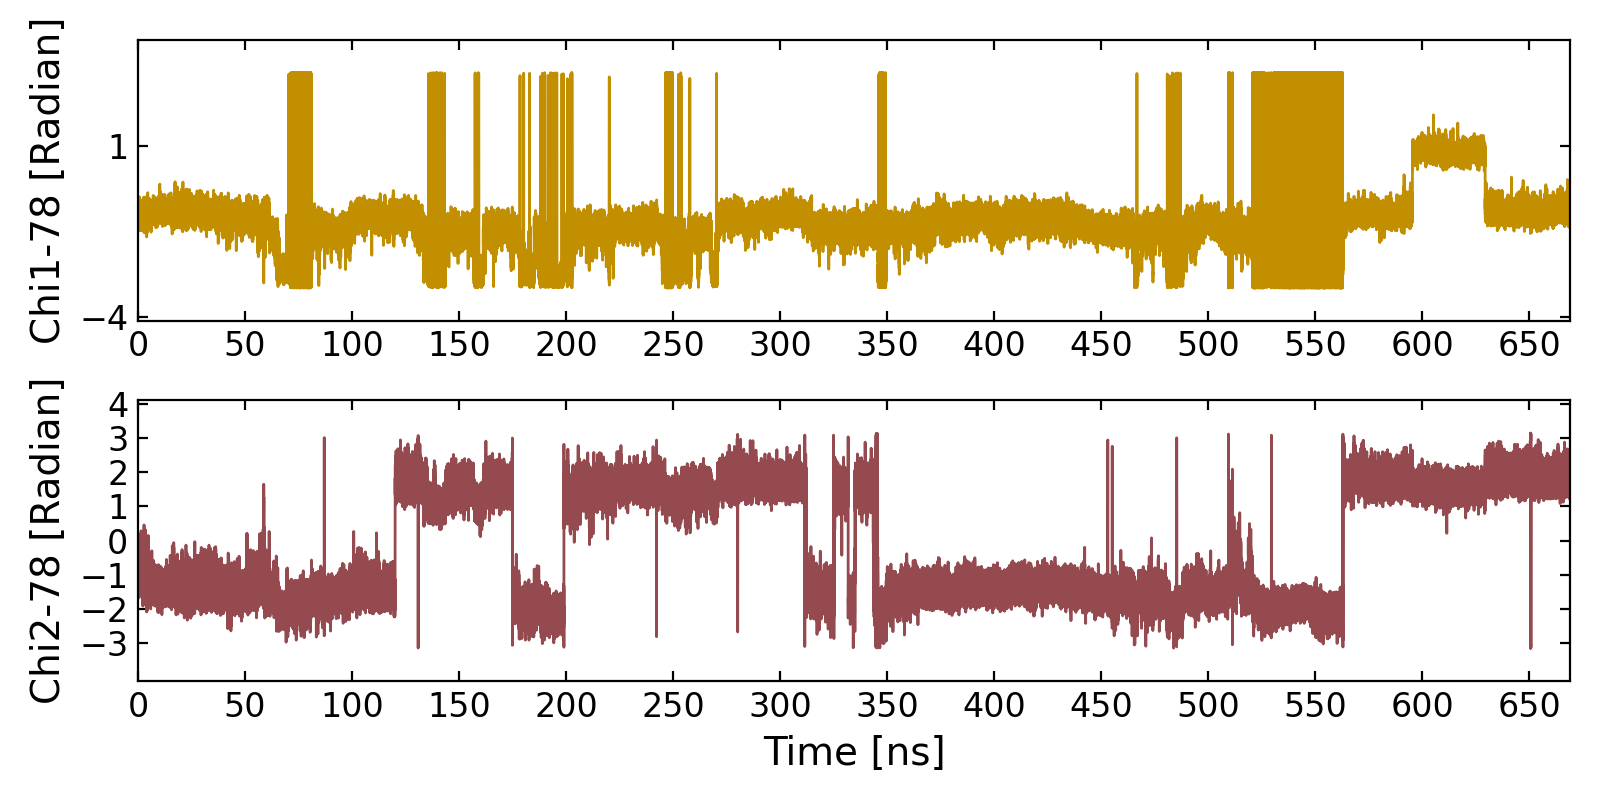

In [3]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR_data", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR_data", comments="#")[:, 4]
ld=np.loadtxt(f"COLVAR_data", comments="#")[:, 13]
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")             
              
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4))
#fig.suptitle(f"Run{run}")
ax1.plot(Time, lp, color=col1['yellow'], linewidth=1.0)
ax2.plot(Time, ld, color=col1['red'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax2.set_xlim([xmin, xmax])
ax1.set_ylim([y1min-1, y1max+1])
ax2.set_ylim([y2min-1, y2max+1])
ax1.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax2.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax1.yaxis.set_ticks(np.arange(int(y1min-1), int(y1max)+2, 5))
ax2.yaxis.set_ticks(np.arange(int(y2min), int(y2max)+2, 1.0))
#ax1.axes.get_xaxis().set_visible(False)
ax2.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('Chi1-78 [Radian]', fontsize=large_font)
ax2.set_ylabel('Chi2-78 [Radian]', fontsize=large_font)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax2.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
# ax1.axhline(3.0, color='black',  linestyle='dashed')
# ax1.axhline(-4.0, color='black',  linestyle='dashed')
# ax2.axhline(4.0, color='black',  linestyle='dashed')
ax1.axhspan(10, 12, facecolor=col1['yellow'], alpha=0.3)
ax2.axhspan(14, 16, facecolor=col1['red'], alpha=0.3)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)
# ax2.legend(leg, loc=1,  fancybox=True, shadow=True)


fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

#plt.savefig(f"dist2-dist3.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

# With sin/cos modification

[-0.085431 -0.108733 -0.255732 ... -0.122945 -0.148064  0.080531]
x-axis minimum and maximum is 0.0 and 669.0
y1-axis minimum and maximum is -0.3 and 1.7
y2-axis minimum and maximum is -0.9 and 1.1


<IPython.core.display.Javascript object>


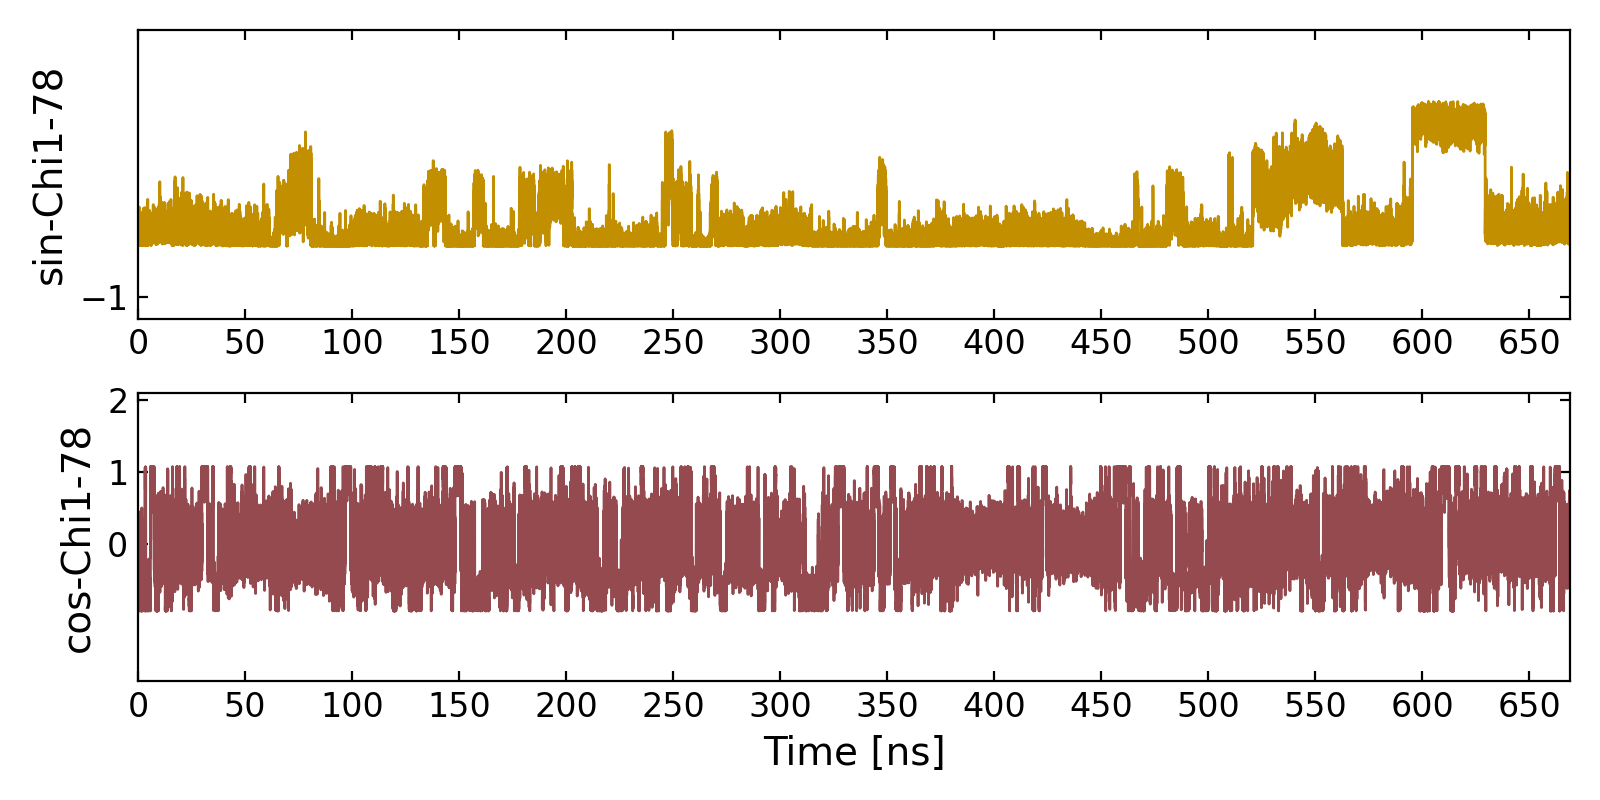

In [4]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR_sincos", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR_sincos", comments="#")[:, 4]
ld=np.loadtxt(f"COLVAR_sincos", comments="#")[:, 9]
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")             
              
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4))
#fig.suptitle(f"Run{run}")
ax1.plot(Time, lp, color=col1['yellow'], linewidth=1.0)
ax2.plot(Time, ld, color=col1['red'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax2.set_xlim([xmin, xmax])
ax1.set_ylim([y1min-1, y1max+1])
ax2.set_ylim([y2min-1, y2max+1])
ax1.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax2.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax1.yaxis.set_ticks(np.arange(int(y1min-1), int(y1max)+2, 5))
ax2.yaxis.set_ticks(np.arange(int(y2min), int(y2max)+2, 1.0))
#ax1.axes.get_xaxis().set_visible(False)
ax2.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('sin-Chi1-78', fontsize=large_font)
ax2.set_ylabel('cos-Chi1-78', fontsize=large_font)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax2.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
# ax1.axhline(3.0, color='black',  linestyle='dashed')
# ax1.axhline(-4.0, color='black',  linestyle='dashed')
# ax2.axhline(4.0, color='black',  linestyle='dashed')
ax1.axhspan(10, 12, facecolor=col1['yellow'], alpha=0.3)
ax2.axhspan(14, 16, facecolor=col1['red'], alpha=0.3)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)
# ax2.legend(leg, loc=1,  fancybox=True, shadow=True)


fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

#plt.savefig(f"dist2-dist3.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()

[-0.746633 -0.500988 -0.165468 ...  1.100347  1.091548  1.047689]
x-axis minimum and maximum is 0.0 and 669.0
y1-axis minimum and maximum is -0.9 and 1.1
y2-axis minimum and maximum is -1.0 and 1.0


<IPython.core.display.Javascript object>


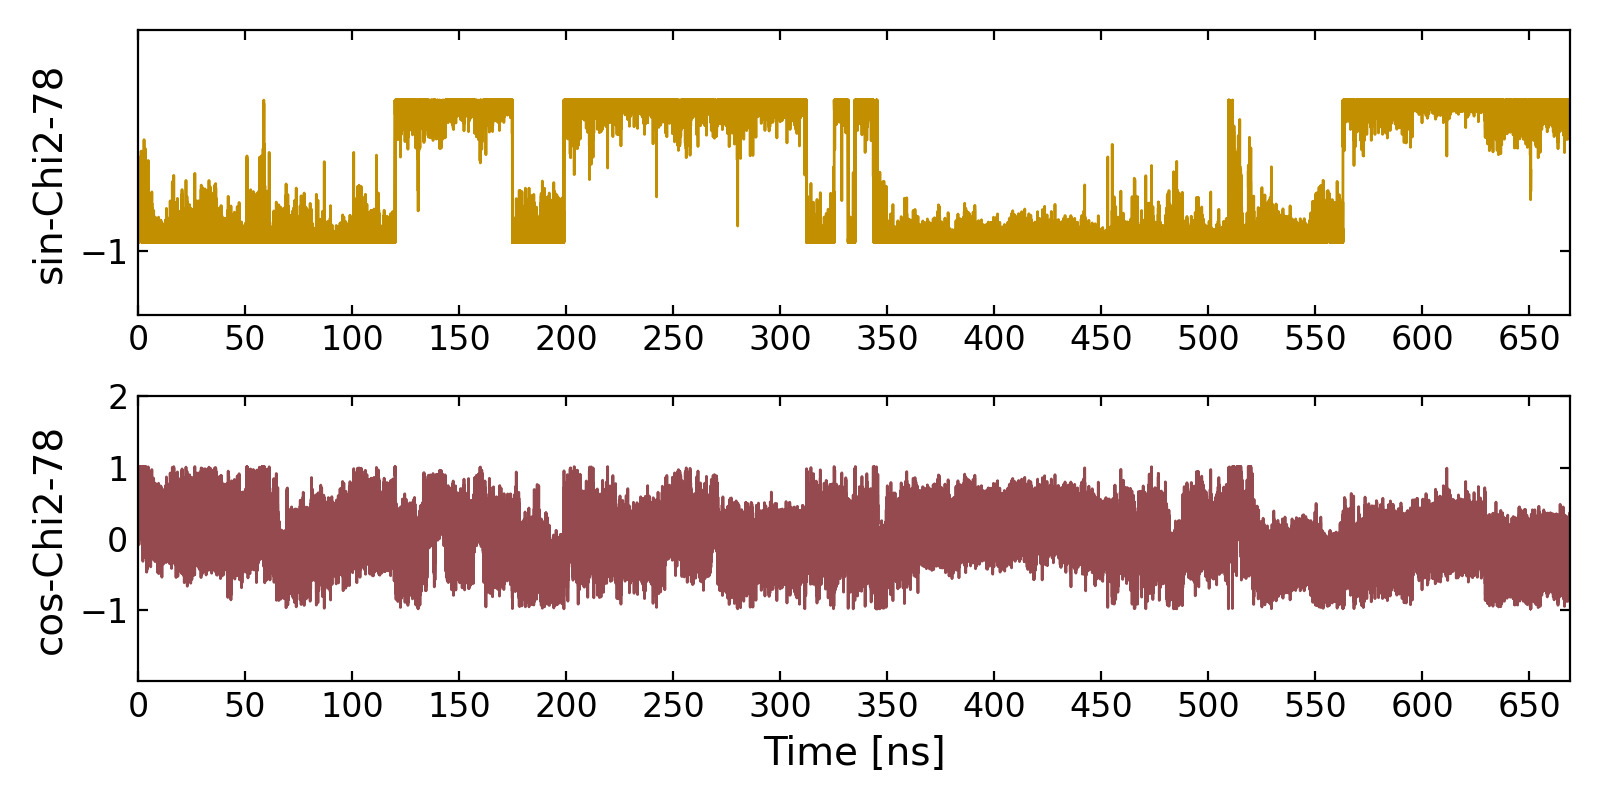

In [5]:
#Plot the CV space that has been sampled during the Funnel MetaD simulation#
%matplotlib notebook

#Read time and convert to ns
Time=np.loadtxt(f"COLVAR_sincos", comments="#")[:, 0]/1000
#Read CVs and convert to Angstrom
lp=np.loadtxt(f"COLVAR_sincos", comments="#")[:, 22]
ld=np.loadtxt(f"COLVAR_sincos", comments="#")[:, 26]
print(lp)
xmin=float("{0:.0f}".format(np.amin(Time)))              
xmax=float("{0:.0f}".format(np.amax(Time)))
y1min=float("{0:.1f}".format(np.amin(lp)))
y1max=float("{0:.1f}".format(np.amax(lp))) 
y2min=float("{0:.1f}".format(np.amin(ld)))
y2max=float("{0:.1f}".format(np.amax(ld))) 

#leg=[f"Run{run}"]
large_font=14
small_font=12
print(f"x-axis minimum and maximum is {xmin} and {xmax}")
print(f"y1-axis minimum and maximum is {y1min} and {y1max}")
print(f"y2-axis minimum and maximum is {y2min} and {y2max}")             
              
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4))
#fig.suptitle(f"Run{run}")
ax1.plot(Time, lp, color=col1['yellow'], linewidth=1.0)
ax2.plot(Time, ld, color=col1['red'], linewidth=1.0)
ax1.set_xlim([xmin, xmax])
ax2.set_xlim([xmin, xmax])
ax1.set_ylim([y1min-1, y1max+1])
ax2.set_ylim([y2min-1, y2max+1])
ax1.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax2.xaxis.set_ticks(np.arange(xmin, xmax+1, 50))
ax1.yaxis.set_ticks(np.arange(int(y1min-1), int(y1max)+2, 5))
ax2.yaxis.set_ticks(np.arange(int(y2min), int(y2max)+2, 1.0))
#ax1.axes.get_xaxis().set_visible(False)
ax2.set_xlabel('Time [ns]', fontsize=large_font)
ax1.set_ylabel('sin-Chi2-78', fontsize=large_font)
ax2.set_ylabel('cos-Chi2-78', fontsize=large_font)
ax1.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
ax2.tick_params(axis='both', bottom=True, top=True, right=True, which='major', labelbottom=True, labeltop=False, direction='in', labelsize=small_font)
# ax1.axhline(3.0, color='black',  linestyle='dashed')
# ax1.axhline(-4.0, color='black',  linestyle='dashed')
# ax2.axhline(4.0, color='black',  linestyle='dashed')
ax1.axhspan(10, 12, facecolor=col1['yellow'], alpha=0.3)
ax2.axhspan(14, 16, facecolor=col1['red'], alpha=0.3)
# ax1.legend(leg, loc=1,  fancybox=True, shadow=True)
# ax2.legend(leg, loc=1,  fancybox=True, shadow=True)


fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout()

#plt.savefig(f"dist2-dist3.png", bbox_inches='tight', dpi=600)
plt.show()
#plt.close()